In [1]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [2]:
# Load the data for a specific stock, e.g., Apple
df = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Display the first few rows
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454504,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393279,447610800


In [5]:
#Data Preprocessing

data = df['Close'].values
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()



C:\Users\HI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
80/80 - 7s - 85ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 2/20
80/80 - 3s - 39ms/step - loss: 2.9518e-04 - val_loss: 0.0024
Epoch 3/20
80/80 - 3s - 42ms/step - loss: 2.6162e-04 - val_loss: 0.0011
Epoch 4/20
80/80 - 3s - 39ms/step - loss: 2.5088e-04 - val_loss: 0.0011
Epoch 5/20
80/80 - 3s - 40ms/step - loss: 2.3153e-04 - val_loss: 0.0011
Epoch 6/20
80/80 - 3s - 40ms/step - loss: 2.1803e-04 - val_loss: 0.0010
Epoch 7/20
80/80 - 3s - 40ms/step - loss: 1.9573e-04 - val_loss: 9.4951e-04
Epoch 8/20
80/80 - 3s - 41ms/step - loss: 1.9795e-04 - val_loss: 9.2255e-04
Epoch 9/20
80/80 - 3s - 43ms/step - loss: 1.8944e-04 - val_loss: 0.0018
Epoch 10/20
80/80 - 3s - 42ms/step - loss: 1.8241e-04 - val_loss: 0.0010
Epoch 11/20
80/80 - 3s - 41ms/step - loss: 1.6098e-04 - val_loss: 0.0020
Epoch 12/20
80/80 - 3s - 42ms/step - loss: 1.6326e-04 - val_loss: 0.0023
Epoch 13/20
80/80 - 3s - 41ms/step - loss: 1.5213e-04 - val_loss: 0.0019
Epoch 14/20
80/80 - 3s - 42ms/step - loss: 1.6442e-04 - 

In [9]:
#Model Evaluation and Prediction
# Reshape y_train and y_test to match the predictions
y_train_reshaped = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_reshaped = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_reshaped, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_reshaped, test_predict))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')



Train RMSE: 1.0831446483369076
Test RMSE: 7.053839531495878


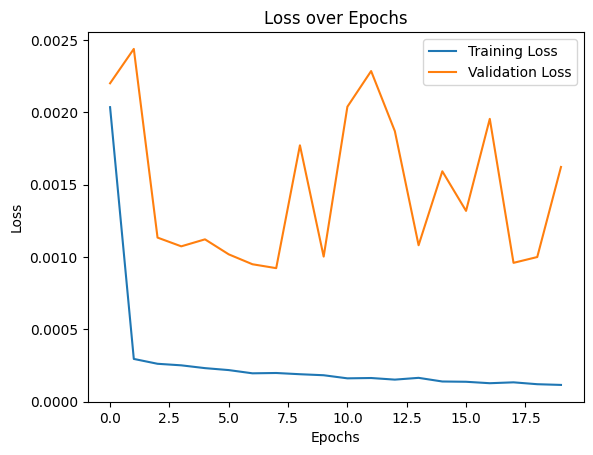

In [31]:
 #Visualizations
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


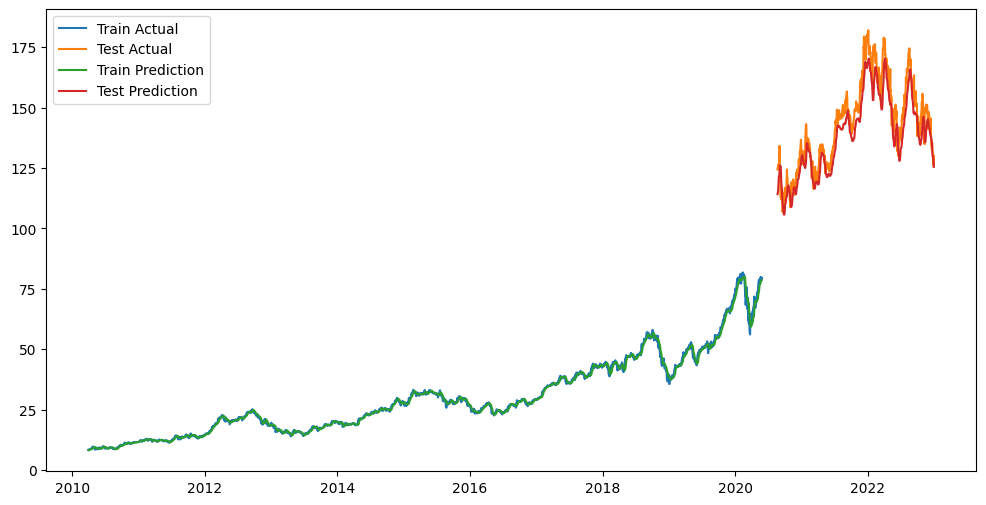

In [12]:

plt.figure(figsize=(12, 6))

# Plot Train Actual Data
train_actual = scaler.inverse_transform(train_data[look_back:])
train_actual = train_actual[:train_predict.shape[0]]  # Ensure same shape
plt.plot(df.index[look_back:look_back + len(train_actual)], train_actual, label='Train Actual')

# Plot Test Actual Data
test_actual = scaler.inverse_transform(test_data[look_back:])
test_actual = test_actual[:test_predict.shape[0]]  # Ensure same shape
plt.plot(df.index[train_size + look_back:train_size + look_back + len(test_actual)], test_actual, label='Test Actual')

# Plot Train Prediction
plt.plot(df.index[look_back:look_back + len(train_predict)], train_predict, label='Train Prediction')

# Plot Test Prediction
plt.plot(df.index[train_size + look_back:train_size + look_back + len(test_predict)], test_predict, label='Test Prediction')

plt.legend()
plt.show()


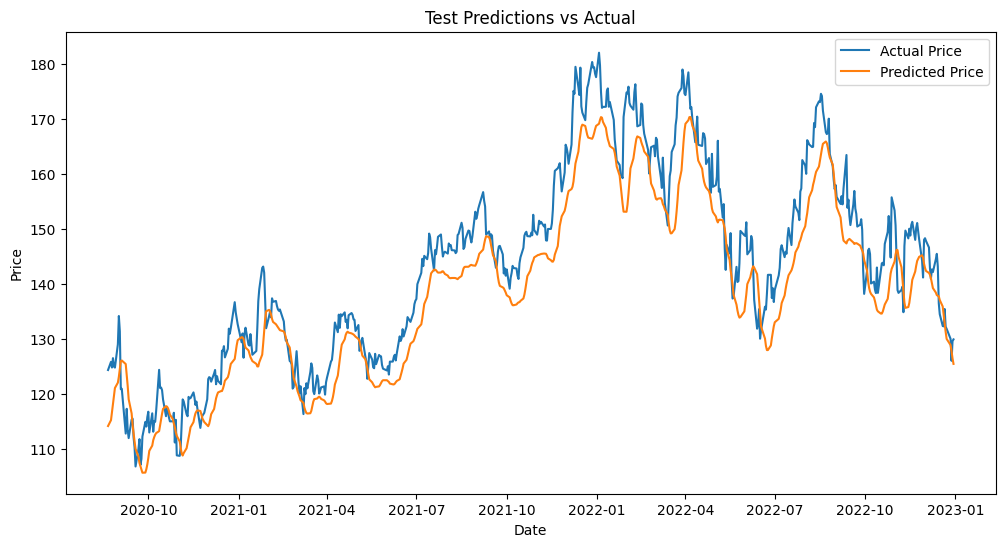

In [14]:
# Calculate the correct length for slicing
correct_length = len(df.index[train_size + look_back:])

# Ensure test_predict has the same length as the index
test_predict = test_predict[-correct_length:]

# Now plot the predictions vs. actual prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size + look_back:], scaler.inverse_transform(test_data[look_back:]), label='Actual Price')
plt.plot(df.index[train_size + look_back:], test_predict, label='Predicted Price')
plt.title('Test Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [18]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions back to the original scale
predictions = scaler.inverse_transform(predictions)

# Also inverse transform the true values for comparison
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


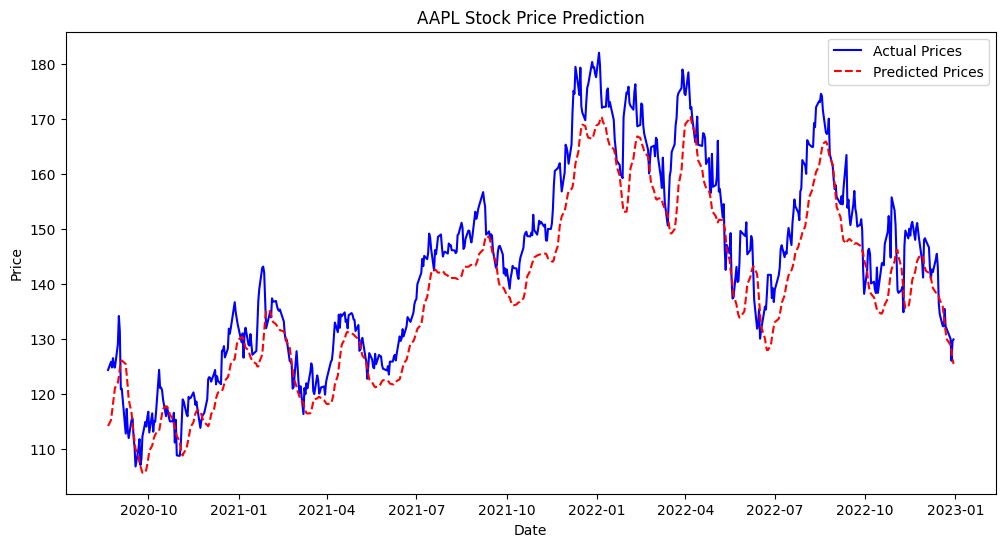

In [20]:
# Assuming 'ticker' is defined as the stock ticker you're analyzing, e.g., 'AAPL'
ticker = 'AAPL'

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions back to the original scale
predictions = scaler.inverse_transform(predictions)

# Also inverse transform the true values for comparison
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_scaled, color='blue', label='Actual Prices')
plt.plot(df.index[-len(predictions):], predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



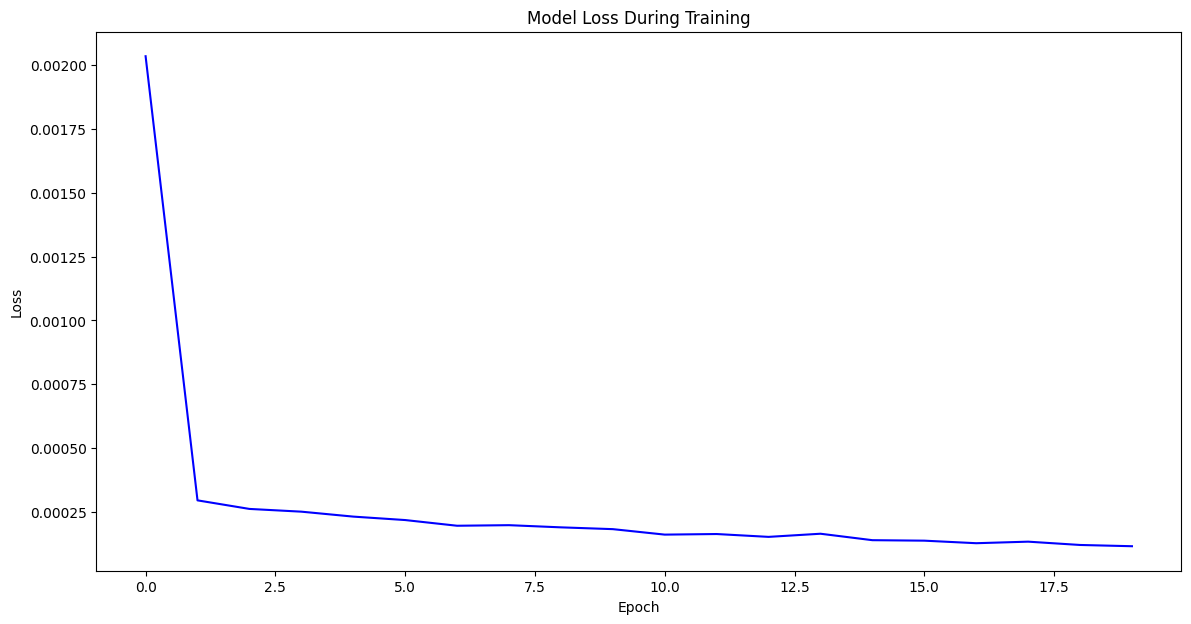

In [22]:
# Plot Training Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], color='blue')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



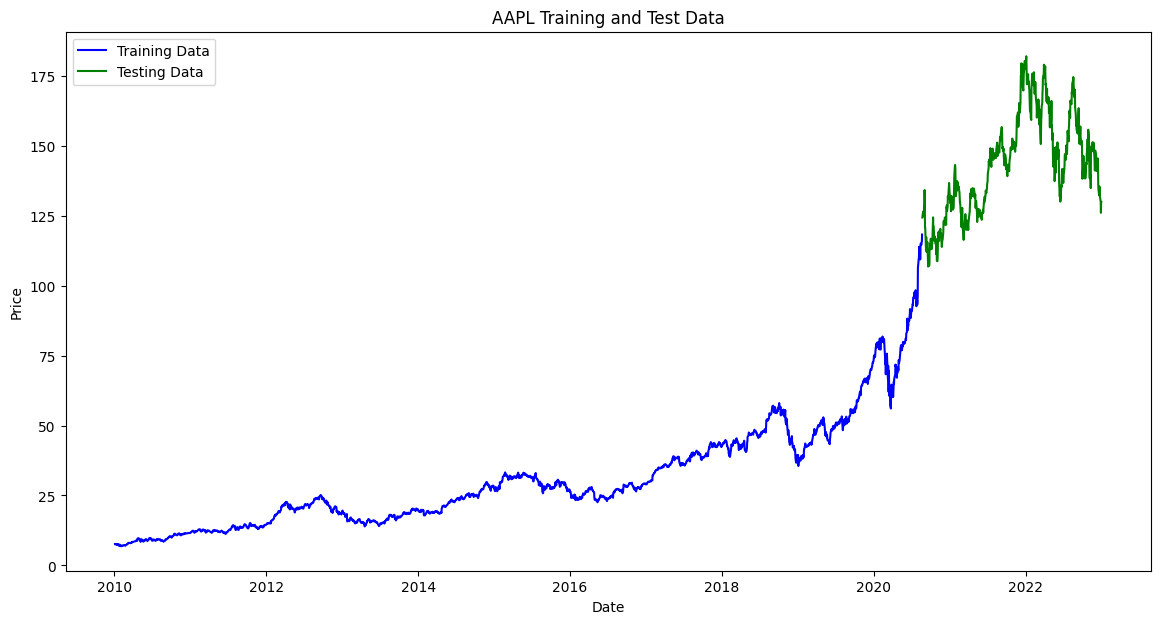

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the entire data or training data
scaler.fit(df[['Close']])

# Transform the data
scaled_data = scaler.transform(df[['Close']])
import matplotlib.pyplot as plt

# Define the split index
split = len(df) - len(predictions)  # Adjust based on your data

# Plot Training and Testing Data
plt.figure(figsize=(14, 7))

# Plot Training Data
plt.plot(df.index[:split], scaler.inverse_transform(scaled_data[:split]), color='blue', label='Training Data')

# Plot Testing Data
plt.plot(df.index[split:], scaler.inverse_transform(scaled_data[split:]), color='green', label='Testing Data')

plt.title(f'{ticker} Training and Test Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

